This notebook performs the parametric square-error k-means clustering algorithm.

In [23]:
import sys
import time
import pandas as pd
sys.path.append('../')
from sklearn.cluster import KMeans
from functions.clustering import perform_clustering, elbow_method, silhouette_method

In [24]:
# read data
data = pd.read_pickle('../data/clustering_input/clustering_df_daily_clean.pkl')

In [25]:
# prepare data for clustering (store and then remove id)
user_id = data['id']
dates = data['date']
data.drop(columns=['id', 'date'], inplace=True)

Performing the elbow method ... 
Elbow method finished after 0.1289381980895996


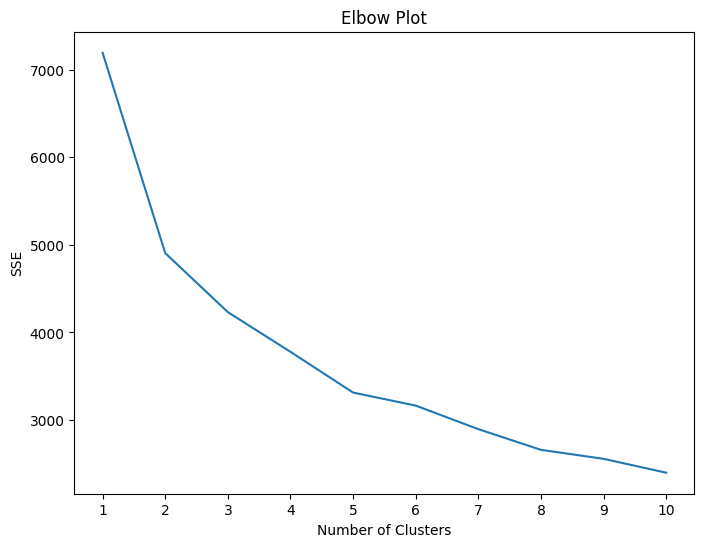

In [26]:
# find optimal k for k-means with the elbow method
elbow_method('kmeans', 'daily', 'clean', data) 

Performing the silhouette method ... 
Silhouette method finished after 11.096628189086914


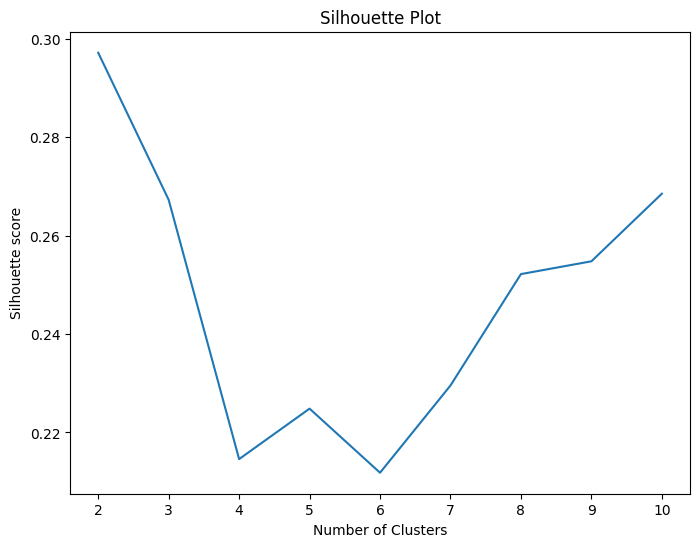

In [27]:
# find optimal k for k-means with the silhouette method
silhouette_method('kmeans', 'daily', 'clean', data)

In [28]:
# perform k-means clustering
start = time.time()
print("Clustering with K-means ... ")
kmeans = KMeans(n_clusters=4, random_state=0, n_init="auto")
metadata = pd.concat([user_id, dates], axis=1)
results = perform_clustering(kmeans, data, metadata)
print("K-means finished after", time.time() - start)
results.to_csv('../data/clustering_results/kmeans_4_results_hourly_clean.csv', index=False)